In [73]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)
print(mnist)

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1,seed = 27)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)                      
#graph structure
def train(learning_rate,beta1,beta2,beta3,index):
    sess = tf.InteractiveSession()
    x = tf.placeholder("float", [None, 784])
    y_ = tf.placeholder("float", [None, 10])

    weights_1 =  weight_variable([784,10])
    b1 = bias_variable([10])
    weights_2 =  weight_variable([10,10])
    b2 = bias_variable([10])

    x2 = tf.nn.relu(tf.matmul(x,weights_1)+b1)
    logits = tf.matmul(x2,weights_2)+b2
    y = tf.nn.softmax(logits)

    #loss function
    #cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))  
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=logits))
    #regularizaiton
    regularizer1 = tf.nn.l2_loss(weights_1) 
    regularizer2 = tf.nn.l2_loss(weights_2)
    regularizer3 = tf.nn.l2_loss(b1)+tf.nn.l2_loss(b2)
    #total loss
    loss = tf.reduce_mean(cross_entropy+beta1*regularizer1+beta2*regularizer2+beta3*regularizer3)
    #optimizer
    train_step = tf.train.AdagradOptimizer(learning_rate).minimize(loss)
   # with tf.Session() as sess:
        #Run Computation & Iterate
    sess.run(tf.initialize_all_variables())
        #print('Initialized')
    for i in range(0,430*4):
        batch = mnist.train.next_batch(128)
        train_step.run(feed_dict={x: batch[0], y_: batch[1]})
        if (i)%40 == 0:
            correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            accu = accuracy.eval(feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})
            result_data1[index,int((i)/40)] = accu
        if (i+1)%500 == 0:
            print("%d lr:%f acc:%f"%(i+1,learning_rate,accu))
    sess.close()
    del sess

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B0E25F7E10>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B0D1D89E10>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001B0D1D89E80>)


In [54]:
np.random.seed(27)
result_data = np.zeros((30,43))
random = -3*np.random.random(30)
y = np.sort(10**random)
x = [0.002,0.04,0.3]
for index in range(0, len(y)):
    lr = y[index]
    beta_w1 = 1/(784*10)
    beta_w2 = 1/(10*10)
    beta_b = 1/(10)
    train(lr,beta_w1,beta_w2,beta_b,index)

500 lr:0.001152 acc:0.234600
1000 lr:0.001152 acc:0.341400
1500 lr:0.001152 acc:0.426200
500 lr:0.002091 acc:0.343800
1000 lr:0.002091 acc:0.489200
1500 lr:0.002091 acc:0.617400
500 lr:0.002186 acc:0.350200
1000 lr:0.002186 acc:0.515200
1500 lr:0.002186 acc:0.637200
500 lr:0.002452 acc:0.375800
1000 lr:0.002452 acc:0.551600
1500 lr:0.002452 acc:0.669000
500 lr:0.002489 acc:0.378000
1000 lr:0.002489 acc:0.562800
1500 lr:0.002489 acc:0.677600
500 lr:0.002667 acc:0.396200
1000 lr:0.002667 acc:0.585200
1500 lr:0.002667 acc:0.691600
500 lr:0.003600 acc:0.482200
1000 lr:0.003600 acc:0.683800
1500 lr:0.003600 acc:0.765800
500 lr:0.004158 acc:0.526800
1000 lr:0.004158 acc:0.720400
1500 lr:0.004158 acc:0.792800
500 lr:0.004468 acc:0.558000
1000 lr:0.004468 acc:0.734000
1500 lr:0.004468 acc:0.802200
500 lr:0.005652 acc:0.658400
1000 lr:0.005652 acc:0.787800
1500 lr:0.005652 acc:0.833000
500 lr:0.005950 acc:0.664600
1000 lr:0.005950 acc:0.795800
1500 lr:0.005950 acc:0.837800
500 lr:0.006220 acc:0

In [74]:
result_data1 = np.zeros((3,43))
x = [0.002,0.04,0.3]
for index in range(0, len(x)):
    lr = x[index]
    beta_w1 = 1/(784*10)
    beta_w2 = 1/(10*10)
    beta_b = 1/(10)
    train(lr,beta_w1,beta_w2,beta_b,index)

500 lr:0.002000 acc:0.329200
1000 lr:0.002000 acc:0.478000
1500 lr:0.002000 acc:0.603800
500 lr:0.040000 acc:0.891800
1000 lr:0.040000 acc:0.910400
1500 lr:0.040000 acc:0.916600
500 lr:0.300000 acc:0.909600
1000 lr:0.300000 acc:0.923400
1500 lr:0.300000 acc:0.926600


## draw the plot

In [55]:
result1 = result_data

In [56]:
import numpy as np
import matplotlib.pyplot as plt

Xmax = np.zeros(43)
Xmin = np.zeros(43)
X_lrmax = np.zeros(43)
X_lrmin = np.zeros(43)
X_lrmedian = np.zeros(43)
Xlr = y
Xsum = np.zeros(30)

# find max and min each test step to get area of accuracy distribution
for n in range(0,43):
    Xmax[n] = np.max(result_data[:,n])
    Xmin[n] = np.min(result_data[:,n])

# calculate area-under-curve and save it to Xsum
for m in range(0,30):   
    Xsum[m]  = np.sum(result_data[m,:])

# find index of learning rate refer to max and min auc 
lr_min_i = np.argwhere(Xsum == np.min(Xsum))
lr_max_i = np.argwhere(Xsum == np.max(Xsum))

lr_min = Xlr[lr_min_i[0,0]]
lr_max = Xlr[lr_max_i[0,0]]


for n in range(0,43):
    X_lrmin[n] = result_data[lr_min_i[0,0],n]
    X_lrmax[n] = result_data[lr_max_i[0,0],n]

In [57]:
Xsum1=Xsum
Xsum1 = np.sort(Xsum1)
Xsum1[15]

33.070599898695946

In [58]:
Xsum

array([ 13.17179999,  18.73699993,  19.29600005,  20.52520002,
        20.76159996,  21.54080005,  24.80140014,  26.18140003,
        26.94360012,  29.02640018,  29.45580019,  29.78180011,
        31.45219998,  33.0705999 ,  34.95000005,  36.71100004,
        37.87000014,  37.88600005,  38.12420015,  38.11780003,
        38.3707999 ,  38.49159996,  38.71620001,  38.8108    ,
        38.75699985,  38.68599974,  38.44899996,  38.59759988,
        29.64639987,  22.00099976])

In [64]:
X1 = result_data[22,:]

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


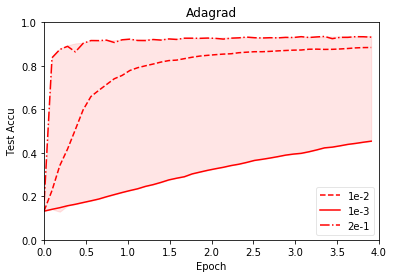

In [66]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/43)
X_lrmedian = result_data[13,:]
fig = plt.figure()
plt.title("Adagrad")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([0,4,0.0,1.0]) 
plt.plot(x_index,X_lrmedian,color = 'red',label='1e-2')
plt.plot(x_index,X_lrmin,'r--',label='1e-3')
plt.plot(x_index,X_lrmax,'r-.',label='2e-1')
plt.fill_between(x_index,Xmin,Xmax,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
plt.savefig("adagrad new.png") 
plt.show()


In [68]:
import pandas as pd
import numpy as np

adagrad_result_csv = pd.DataFrame(np.zeros((30,43)))
adagrad_result_csv.iloc[:,:] = result_data
adagrad_result_csv.to_csv('adagrad',index=False)
training_csv = pd.read_csv('adagrad',index_col=0)
training_csv

np.save('adagrad-np.npy',result_data)

D:\anaconda\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


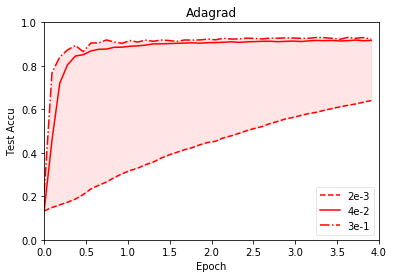

In [76]:
import matplotlib 
from matplotlib.ticker import  MultipleLocator
matplotlib.use('Agg')
x_index=np.arange(0,4,4.0/43)
X1 = result_data1[0,:]
X2 = result_data1[1,:]
X3 = result_data1[2,:]
fig = plt.figure()
plt.title("Adagrad")
plt.xlabel('Epoch')
plt.ylabel('Test Accu')
plt.axis([0,4,0.0,1.0]) 
plt.plot(x_index,X1,'r--',label='2e-3')
plt.plot(x_index,X2,color = 'red',label='4e-2')
plt.plot(x_index,X3,'r-.',label='3e-1')
plt.fill_between(x_index,X1,X3,color = 'red',alpha = '0.1')
plt.legend(loc='lower right',framealpha = 0.5)
plt.savefig("adagrad para.png") 
plt.show()

In [62]:
result_data[23,:]

array([ 0.1804    ,  0.83719999,  0.875     ,  0.88980001,  0.8642    ,
        0.9034    ,  0.91640002,  0.91600001,  0.91820002,  0.90740001,
        0.91979998,  0.9228    ,  0.91659999,  0.91619998,  0.921     ,
        0.91839999,  0.92379999,  0.92140001,  0.92720002,  0.92720002,
        0.92659998,  0.9278    ,  0.92640001,  0.92299998,  0.92739999,
        0.92879999,  0.93220001,  0.92940003,  0.92799997,  0.92940003,
        0.92860001,  0.93099999,  0.93019998,  0.93419999,  0.93040001,
        0.93300003,  0.93519998,  0.92500001,  0.93099999,  0.93099999,
        0.93419999,  0.93379998,  0.93180001])